# Analysing Performance of Stocks using Causal Discovery

## Setup

Import the datasets:

In [47]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path+"\\DataPreprocessing")

## Data Loading

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data_dir = "C:/Users/diego/iCloudDrive/Documents/MBZUAI Sem/Semester 2/ML703 Probabilistic and Statistical Inference/Project/JN/Datasets/"

company = pd.read_csv(data_dir + "Company.csv")
companyValues = pd.read_csv(data_dir + "CompanyValues.csv")
companyTweet = pd.read_csv(data_dir + "Company_Tweet.csv")
tweet = pd.read_csv(data_dir + "Tweet.csv")
tweet = tweet.merge(companyTweet, on="tweet_id", how='inner')

In [50]:
company.ticker_symbol.unique()

array(['AAPL', 'GOOG', 'GOOGL', 'AMZN', 'TSLA', 'MSFT'], dtype=object)

In [51]:
companyValues.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [52]:
companyValuesSub = companyValues[companyValues.ticker_symbol == 'TSLA']
tweetSub = tweet[tweet.ticker_symbol == 'TSLA']

### One Company Analysis

#### Tweet data preprocessing

In [53]:
from data import set_datetime, detrend_ts

tweetSub['date'] = set_datetime(tweetSub.post_date)

tweetSubMetrics = tweetSub[['date', 'comment_num', 'retweet_num', 'like_num']]
tweetSubMetrics = tweetSubMetrics.groupby(["date"]).sum()
tweetSubMetrics2019 = tweetSubMetrics[(tweetSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetSubMetrics.index <= pd.to_datetime("2019/12/31"))]

tweetSubMetrics2019.head(3)

C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,comment_num,retweet_num,like_num
date,,,
2018-12-25,432,354,3395
2018-12-26,602,815,5048
2018-12-27,778,709,5513


In [54]:
tweetSubMetrics2019['log_retweet_num'] = np.log(tweetSubMetrics2019['retweet_num'])
tweetSubMetrics2019['log_comment_num'] = np.log(tweetSubMetrics2019['comment_num'])

tweetSubMetrics2019['detrended_log_comment_num'] = detrend_ts(tweetSubMetrics2019.log_comment_num)

tweetSubMetrics2019 = tweetSubMetrics2019[-365:]

C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

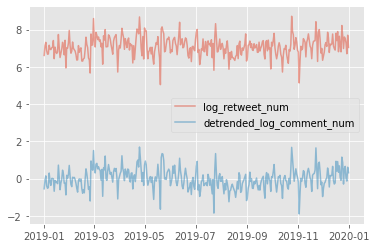

In [55]:
plt.plot(tweetSubMetrics2019.log_retweet_num, alpha=0.5, label="log_retweet_num")
plt.plot(tweetSubMetrics2019.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

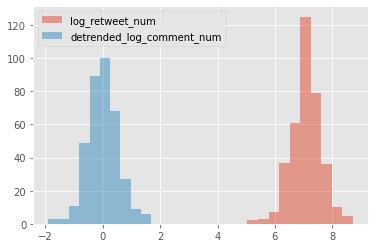

In [56]:
plt.hist(tweetSubMetrics2019.log_retweet_num, alpha=0.5, label="log_retweet_num")
plt.hist(tweetSubMetrics2019.detrended_log_comment_num, alpha=0.5, label="detrended_log_comment_num")
plt.legend()

In [57]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(tweetSubMetrics2019.log_retweet_num)
print('Log Retweet Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

result = adfuller(tweetSubMetrics2019.detrended_log_comment_num)
print('Detrended Log Tweet Comment Number test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Log Retweet Number test:
ADF Statistic: -3.677427
p-value: 0.004442
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Detrended Log Tweet Comment Number test:
ADF Statistic: -2.804106
p-value: 0.057690
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


#### Value data preprocessing

In [58]:
companyValuesSub['date'] = pd.to_datetime(companyValuesSub['day_date']).dt.date
companyValuesSubMetrics = companyValuesSub[['date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesSubMetrics = companyValuesSubMetrics.groupby(['date']).sum()
companyValuesSubMetrics2019 = companyValuesSubMetrics[(companyValuesSubMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (companyValuesSubMetrics.index <= pd.to_datetime("2019/12/31"))]

companyValuesSubMetrics2019.head(3)

C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,close_value,volume,open_value,high_value,low_value
date,,,,,
2018-12-25,295.39,5559913,313.50,314.5000,295.195
2018-12-26,326.09,8143102,300.00,326.9700,294.090
2018-12-27,316.13,8567385,319.84,322.1717,301.500


C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\diego\iCloudDrive\Documents\MBZUAI Sem\Semester 2\ML703 Probabilistic and Statistical Inference\Project\JN\ml703_timeSeriesCausalDiscovery\DataPreprocessing\data.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[lag_column] = temp[-final_ts_len:]


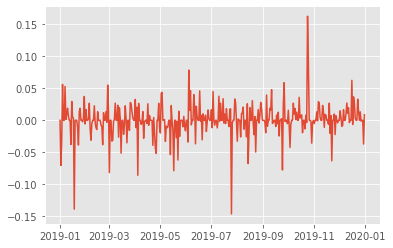

In [59]:
from data import set_datetime, detrend_ts, take_diff_ts

companyValuesSubMetrics2019['log_close_value'] = np.log(companyValuesSubMetrics2019['close_value'])

companyValuesSubMetrics2019 = take_diff_ts(data=companyValuesSubMetrics2019, \
    ts_column='log_close_value', lag_column='lag_log_close_value', lag=1, final_ts_len=365)

plt.plot(companyValuesSubMetrics2019.lag_log_close_value)

(array([  2.,   1.,   8.,  28., 227.,  83.,  13.,   2.,   0.,   1.]),
 array([-0.14634122, -0.11543636, -0.0845315 , -0.05362664, -0.02272178,
         0.00818308,  0.03908794,  0.0699928 ,  0.10089766,  0.13180252,
         0.16270738]),
 <BarContainer object of 10 artists>)

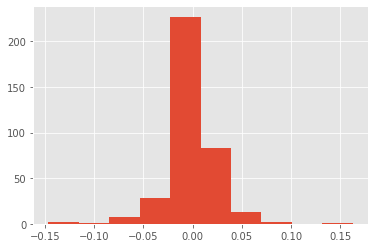

In [60]:
plt.hist(companyValuesSubMetrics2019.lag_log_close_value)

In [61]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(companyValuesSubMetrics2019.lag_log_close_value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -18.635766
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [62]:
dataFrame = np.column_stack((companyValuesSubMetrics2019.lag_log_close_value,
                    tweetSubMetrics2019.log_retweet_num,
                    tweetSubMetrics2019.detrended_log_comment_num))
dataFrame[:5]

array([[ 0.        ,  6.61204103, -0.54695628],
       [-0.07058239,  7.12849595, -0.07861812],
       [-0.03197756,  7.31388683,  0.14831061],
       [ 0.05609431,  6.87005341, -0.38452907],
       [ 0.        ,  6.67708346, -0.51965665]])

Text(0, 0.5, 'log_retweet_num')

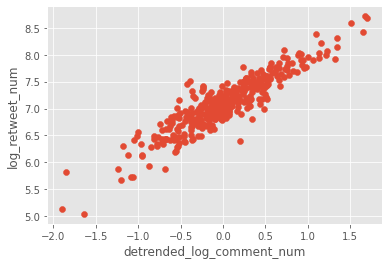

In [63]:
plt.scatter(dataFrame[:, 2], dataFrame[:, 1])
plt.xlabel("detrended_log_comment_num")
plt.ylabel("log_retweet_num")

#### Causal Discovery

In [64]:
# Imports

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
plt.style.use('ggplot')

from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC

In [65]:
# Initialize dataframe object, specify time axis and variable names
var_names = [r'$X^0$', r'$Y^0$', r'$Y^1$']
dataframe = pp.DataFrame(dataFrame, 
                         datatime = np.arange(len(dataFrame)), 
                         var_names=var_names)

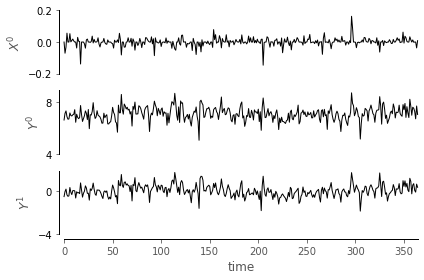

In [66]:
tp.plot_timeseries(dataframe); plt.show()

##### Partial Correlation

In [68]:
parcorr = ParCorr(significance='analytic')

pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

In [ ]:
correlations = pcmci.get_lagged_dependencies(tau_max=28, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, setup_args={'var_names':var_names, 
                                    'x_base':5, 'y_base':.5}); plt.show()

In [69]:
results = pcmci.run_pcmci(tau_max=8, pc_alpha=0.5)
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable $X^0$ has 5 link(s):
        ($Y^1$ -5): max_pval = 0.30359, min_val =  0.056
        ($Y^0$ -2): max_pval = 0.41466, min_val =  0.044
        ($X^0$ -8): max_pval = 0.43587, min_val = -0.042
        ($X^0$ -4): max_pval = 0.43893, min_val =  0.042
        ($Y^0$ -7): max_pval = 0.47537, min_val =  0.038

    Variable $Y^0$ has 9 link(s):
        ($Y^1$ -1): max_pval = 0.00608, min_val =  0.147
        ($Y^1$ -7): max_pval = 0.03173, min_val =  0.116
        ($X^0$ -2): max_pval = 0.05275, min_val =  0.105
        ($Y^1$ -6): max_pval = 0.09310, min_val =  0.090
        ($Y^1$ -2): max_pval = 0.27132, min_val = -0.060
        ($X^0$ -1): max_pval = 0.31320, min_val =  0.054
        ($X^0$ -7): max_pval = 0.33467, min_val =  0.052
        ($Y^0$ -4): max

In [70]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=8, fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable $X^0$ has 0 link(s):

    Variable $Y^0$ has 2 link(s):
        ($Y^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.909
        ($Y^1$ -1): pval = 0.00000 | qval = 0.00000 | val =  0.330

    Variable $Y^1$ has 2 link(s):
        ($Y^0$  0): pval = 0.00000 | qval = 0.00000 | val =  0.909
        ($Y^1$ -1): pval = 0.00001 | qval = 0.00023 | val =  0.244


In [71]:
link_matrix = pcmci.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

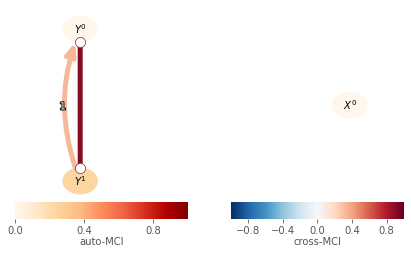

In [72]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()

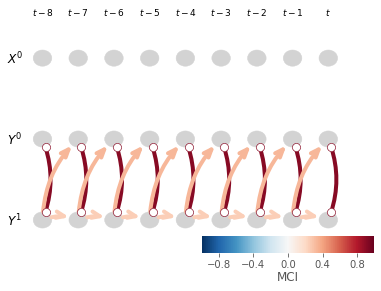

In [73]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

##### Gaussian Processes

In [74]:
gpdc = GPDC(significance='analytic', gp_params=None)
pcmci_gpdc = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=gpdc,
    verbosity=0)

In [75]:
results = pcmci_gpdc.run_pcmci(tau_max=8, pc_alpha=0.5)
pcmci_gpdc.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)

C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
C:\Users\diego\anaconda3\envs


## Significant links at alpha = 0.01:

    Variable $X^0$ has 4 link(s):
        ($Y^1$  0): pval = 0.00000 | val =  0.216
        ($Y^0$  0): pval = 0.00100 | val =  0.172
        ($X^0$ -7): pval = 0.00300 | val =  0.162
        ($Y^1$ -7): pval = 0.00900 | val =  0.151

    Variable $Y^0$ has 3 link(s):
        ($Y^1$  0): pval = 0.00000 | val =  0.811
        ($X^0$  0): pval = 0.00100 | val =  0.172
        ($X^0$ -1): pval = 0.00300 | val =  0.164

    Variable $Y^1$ has 4 link(s):
        ($Y^0$  0): pval = 0.00000 | val =  0.811
        ($Y^1$ -1): pval = 0.00000 | val =  0.372
        ($X^0$  0): pval = 0.00000 | val =  0.216
        ($Y^1$ -7): pval = 0.00000 | val =  0.178


In [76]:
q_matrix = pcmci_gpdc.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=8, fdr_method='fdr_bh')
pcmci_gpdc.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable $X^0$ has 2 link(s):
        ($Y^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.216
        ($Y^0$  0): pval = 0.00100 | qval = 0.00100 | val =  0.172

    Variable $Y^0$ has 2 link(s):
        ($Y^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.811
        ($X^0$  0): pval = 0.00100 | qval = 0.00100 | val =  0.172

    Variable $Y^1$ has 4 link(s):
        ($Y^0$  0): pval = 0.00000 | qval = 0.00000 | val =  0.811
        ($Y^1$ -1): pval = 0.00000 | qval = 0.00000 | val =  0.372
        ($X^0$  0): pval = 0.00000 | qval = 0.00000 | val =  0.216
        ($Y^1$ -7): pval = 0.00000 | qval = 0.00000 | val =  0.178


In [77]:
link_matrix = pcmci_gpdc.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

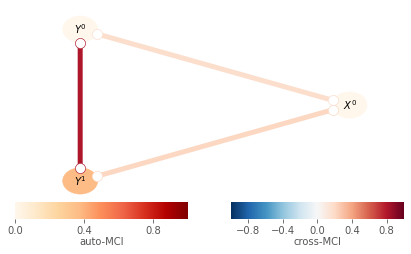

In [78]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()

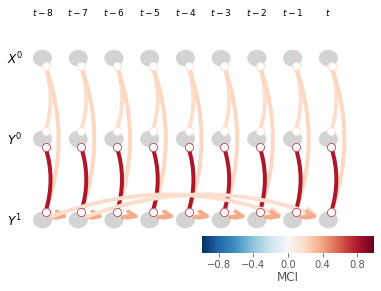

In [79]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

## All Companies Analysis

#### Tweet data preprocessing

In [125]:
from data import set_datetime, detrend_ts

tweet['date'] = set_datetime(tweet.post_date)

tweetMetrics = tweet[['ticker_symbol', 'date', 'comment_num', 'retweet_num', 'like_num']]
tweetMetrics = tweetMetrics.groupby(["ticker_symbol", "date"]).sum().reset_index()
tweetMetrics = tweetMetrics.pivot(index='date', columns=['ticker_symbol'])
tweetMetrics.columns = ["_".join(col) for col in tweetMetrics.columns]
tweetMetrics2019 = tweetMetrics[(tweetMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (tweetMetrics.index <= pd.to_datetime("2019/12/31"))]

tweetMetrics2019.head(3)

C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,comment_num_AAPL,comment_num_AMZN,comment_num_GOOG,comment_num_GOOGL,comment_num_MSFT,comment_num_TSLA,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,retweet_num_TSLA,like_num_AAPL,like_num_AMZN,like_num_GOOG,like_num_GOOGL,like_num_MSFT,like_num_TSLA
date,,,,,,,,,,,,,,,,,,
2018-12-25,108,62,7,16,13,432,214,118,4,49,15,354,906,531,43,168,92,3395
2018-12-26,79,231,21,68,41,602,210,432,56,51,57,815,537,1679,122,381,231,5048
2018-12-27,118,184,8,78,33,778,190,235,16,108,42,709,713,1388,40,438,173,5513


In [126]:
for col in tweetMetrics2019.columns:
    print(f"Processing {col}")
    if sum(tweetMetrics2019[col] == 0) > 0:
        tweetMetrics2019[f'sqrt_{col}'] = np.sqrt(tweetMetrics2019[col])
        tweetMetrics2019[f'detrended_sqrt_{col}'] = detrend_ts(tweetMetrics2019[f'sqrt_{col}'])
    else:
        tweetMetrics2019[f'log_{col}'] = np.log(tweetMetrics2019[col])
        tweetMetrics2019[f'detrended_log_{col}'] = detrend_ts(tweetMetrics2019[f'log_{col}'])

tweetMetrics2019 = tweetMetrics2019[-365:]

Processing comment_num_AAPL
Processing comment_num_AMZN
Processing comment_num_GOOG
Processing comment_num_GOOGL
Processing comment_num_MSFT
Processing comment_num_TSLA
Processing retweet_num_AAPL
Processing retweet_num_AMZN
Processing retweet_num_GOOG
Processing retweet_num_GOOGL
Processing retweet_num_MSFT
Processing retweet_num_TSLA
Processing like_num_AAPL
Processing like_num_AMZN
Processing like_num_GOOG
Processing like_num_GOOGL
Processing like_num_MSFT
Processing like_num_TSLA


C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [140]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews

stationary_cols = []

for col in tweetMetrics2019.columns:
    adf_result = adfuller(tweetMetrics2019[col])
    print(f'{col.upper()} test:')
    print(f'ADF Statistic: {adf_result[0]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('p-value: %f' % adf_result[1])
    print("Non-Stationary") if adf_result[1] > 0.05 else print("Stationary")
    
    # t_stat, p_value, critical_values, _, _ = zivot_andrews(stationary_with_break[0].values)
    za_result = zivot_andrews(tweetMetrics2019[col])
    print(f'Zivot-Andrews Statistic: {za_result[0]:.2f}')
    for key, value in za_result[2].items():
        print('Critial Values:')
        print(f'   {key}, {value:.2f}')
    print(f'\np-value: {za_result[1]:.2f}')
    print("Non-Stationary") if za_result[1] > 0.05 else print("Stationary")

    if (adf_result[1] < 0.05) & (za_result[1] < 0.05):
        stationary_cols.append(col)

len(stationary_cols)

COMMENT_NUM_AAPL test:
ADF Statistic: -14.938642879095228
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -15.41
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_AMZN test:
ADF Statistic: -13.972878362422568
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -14.75
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_GOOG test:
ADF Statistic: -13.229251578608721
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.000000
Stationary
Zivot-Andrews Statistic: -13.64
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
COMMENT_NUM_GOOGL test:
ADF Statistic: -13.87193425963207
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.000000
Stationar

44

In [156]:
stationary_cols[6:12]

['retweet_num_AAPL',
 'retweet_num_AMZN',
 'retweet_num_GOOG',
 'retweet_num_GOOGL',
 'retweet_num_MSFT',
 'retweet_num_TSLA']

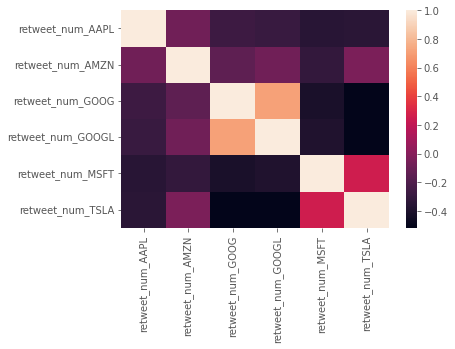

In [157]:
import seaborn as sn

# Correlation between Stationary variables
corrMatrix = tweetMetrics2019[stationary_cols[6:12]].corr().corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()


In [158]:
abs(corrMatrix[:]) > 0.75

,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,retweet_num_TSLA
retweet_num_AAPL,True,False,False,False,False,False
retweet_num_AMZN,False,True,False,False,False,False
retweet_num_GOOG,False,False,True,False,False,False
retweet_num_GOOGL,False,False,False,True,False,False
retweet_num_MSFT,False,False,False,False,True,False
retweet_num_TSLA,False,False,False,False,False,True


In [161]:
tweetMetricsFinal = tweetMetrics2019[stationary_cols[6:12]]

tweetMetricsFinal.head(3)

,retweet_num_AAPL,retweet_num_AMZN,retweet_num_GOOG,retweet_num_GOOGL,retweet_num_MSFT,retweet_num_TSLA
date,,,,,,
2019-01-01,163,208,8,45,74,744
2019-01-02,9,260,16,50,40,1247
2019-01-03,5215,405,55,153,94,1501


#### Value data preprocessing

In [173]:
companyValues['date'] = pd.to_datetime(companyValues['day_date']).dt.date
companyValuesMetrics = companyValues[['ticker_symbol', 'date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesMetrics = companyValuesMetrics.groupby(["ticker_symbol", 'date']).sum().reset_index()
companyValuesMetrics = companyValuesMetrics.pivot(index='date', columns=['ticker_symbol'])
companyValuesMetrics.columns = ["_".join(col) for col in companyValuesMetrics.columns]
companyValuesMetrics2019 = companyValuesMetrics[(companyValuesMetrics.index >= pd.to_datetime("2018/12/25")) \
    & (companyValuesMetrics.index <= pd.to_datetime("2019/12/31"))]

companyValuesMetrics2019.head(3)

C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,close_value_AAPL,close_value_AMZN,close_value_GOOG,close_value_GOOGL,close_value_MSFT,close_value_TSLA,volume_AAPL,volume_AMZN,volume_GOOG,volume_GOOGL,...,high_value_GOOG,high_value_GOOGL,high_value_MSFT,high_value_TSLA,low_value_AAPL,low_value_AMZN,low_value_GOOG,low_value_GOOGL,low_value_MSFT,low_value_TSLA
date,,,,,,,,,,,,,,,,,,,,,
2018-12-25,146.83,1343.96,976.22,984.67,94.13,295.39,37169230.0,7219996.0,1590328.0,1817955.0,...,1003.54,1012.1195,97.97,314.5000,146.59,1307.00,970.11,977.6599,93.98,295.195
2018-12-26,157.17,1470.90,1039.46,1047.85,100.56,326.09,58133850.0,10332870.0,2337212.0,2306710.0,...,1040.00,1048.4500,100.69,326.9700,146.72,1363.01,983.00,992.6450,93.96,294.090
2018-12-27,156.15,1461.64,1043.88,1052.90,101.18,316.13,51608850.0,9631228.0,2102069.0,2265984.0,...,1043.89,1053.3400,101.19,322.1717,150.07,1390.31,997.00,1007.0000,96.40,301.500


In [174]:
companyValuesMetrics2019.columns[:6]

Index(['close_value_AAPL', 'close_value_AMZN', 'close_value_GOOG',
       'close_value_GOOGL', 'close_value_MSFT', 'close_value_TSLA'],
      dtype='object')

C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

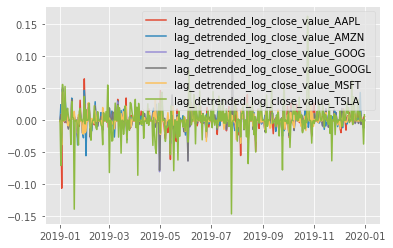

In [186]:
from data import set_datetime, detrend_ts, take_diff_ts

companyCloseValuesMetrics2019 = companyValuesMetrics2019[companyValuesMetrics2019.columns[:6]]

for col in companyCloseValuesMetrics2019.columns:
    companyCloseValuesMetrics2019[f'log_{col}'] = np.log(companyCloseValuesMetrics2019[col])
for col in companyCloseValuesMetrics2019.columns:
    companyCloseValuesMetrics2019[f'detrended_{col}'] = detrend_ts(companyCloseValuesMetrics2019[f'{col}'])

# Take differencing
lag = 1
final_ts_len = 365
temp_lag = {}
for col in companyCloseValuesMetrics2019.columns:
    temp = np.diff(companyCloseValuesMetrics2019[col], n=lag)
    temp_lag[f"lag_{col}"] = temp
companyCloseValuesMetrics2019 = companyCloseValuesMetrics2019[-final_ts_len:]
for col in companyCloseValuesMetrics2019.columns:
    companyCloseValuesMetrics2019[f"lag_{col}"] = temp_lag[f"lag_{col}"][-final_ts_len:]

for col in companyCloseValuesMetrics2019.columns[-6:]:
    plt.plot(companyCloseValuesMetrics2019[f'{col}'], label=f'{col}')
plt.legend()

In [187]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import zivot_andrews

stationary_cols = []

for col in companyCloseValuesMetrics2019.columns:
    adf_result = adfuller(companyCloseValuesMetrics2019[col])
    print(f'{col.upper()} test:')
    print(f'ADF Statistic: {adf_result[0]}')
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('p-value: %f' % adf_result[1])
    print("Non-Stationary") if adf_result[1] > 0.05 else print("Stationary")
    
    # t_stat, p_value, critical_values, _, _ = zivot_andrews(stationary_with_break[0].values)
    za_result = zivot_andrews(companyCloseValuesMetrics2019[col])
    print(f'Zivot-Andrews Statistic: {za_result[0]:.2f}')
    for key, value in za_result[2].items():
        print('Critial Values:')
        print(f'   {key}, {value:.2f}')
    print(f'\np-value: {za_result[1]:.2f}')
    print("Non-Stationary") if za_result[1] > 0.05 else print("Stationary")

    if (adf_result[1] < 0.05) & (za_result[1] < 0.05):
        stationary_cols.append(col)

len(stationary_cols)

CLOSE_VALUE_AAPL test:
ADF Statistic: 0.5209583561479538
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
p-value: 0.985496
Non-Stationary
Zivot-Andrews Statistic: -4.48
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.13
Non-Stationary
CLOSE_VALUE_AMZN test:
ADF Statistic: -2.93778979193363
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.041127
Stationary
Zivot-Andrews Statistic: -4.45
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.14
Non-Stationary
CLOSE_VALUE_GOOG test:
ADF Statistic: -1.7502700301471532
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.405415
Non-Stationary
Zivot-Andrews Statistic: -6.14
Critial Values:
   1%, -5.28
Critial Values:
   5%, -4.81
Critial Values:
   10%, -4.57

p-value: 0.00
Stationary
CLOSE_VALUE_GOOGL test:
ADF Statistic: -1.729075688233856
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
p-value: 0.416197

26

In [191]:
stationary_cols[2:8]

['lag_close_value_AAPL',
 'lag_close_value_AMZN',
 'lag_close_value_GOOG',
 'lag_close_value_GOOGL',
 'lag_close_value_MSFT',
 'lag_close_value_TSLA']

In [192]:
companyCloseValuesMetricsFinal = companyCloseValuesMetrics2019[stationary_cols[2:8]]

companyCloseValuesMetricsFinal.head(3)

,lag_close_value_AAPL,lag_close_value_AMZN,lag_close_value_GOOG,lag_close_value_GOOGL,lag_close_value_MSFT,lag_close_value_TSLA
date,,,,,,
2019-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.003495,0.092827,0.036487,0.035126,-0.017852,-0.165929
2019-01-03,-0.305460,-0.097049,-0.106148,-0.105559,-0.147572,-0.071405


In [195]:
dataFrameCompanies = np.column_stack((
    companyCloseValuesMetricsFinal,
    tweetMetricsFinal))
dataFrameCompanies[:5].shape

(5, 12)

#### Causal Discovery

In [196]:
# Imports

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
plt.style.use('ggplot')

from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, GPDC

In [197]:
# Initialize dataframe object, specify time axis and variable names
var_names_companies = [r'$X^0$', r'$X^1$', r'$X^2$', r'$X^3$', r'$X^4$', r'$X^5$', 
            r'$Y^0$', r'$Y^1$', r'$Y^2$', r'$Y^3$', r'$Y^4$', r'$Y^5$']
dataframe_companies = pp.DataFrame(dataFrameCompanies, 
                         datatime = np.arange(len(dataFrameCompanies)), 
                         var_names=var_names_companies)

C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\tigramite-4.2.2.1-py3.7-win-amd64.egg\tigramite\plotting.py:287: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  pyplot.tight_layout()
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\tigramite-4.2.2.1-py3.7-win-amd64.egg\tigramite\plotting.py:382: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  pyplot.tight_layout()


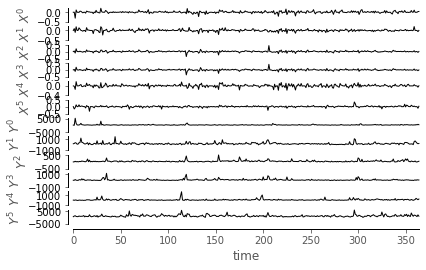

In [198]:
tp.plot_timeseries(dataframe_companies); plt.show()

##### Partial Correlation

In [199]:
parcorr = ParCorr(significance='analytic')

pcmci = PCMCI(
    dataframe=dataframe_companies, 
    cond_ind_test=parcorr,
    verbosity=1)


##
## Estimating lagged dependencies 
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 28


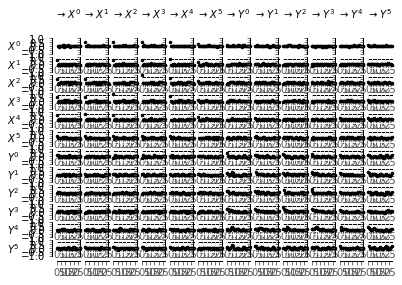

In [201]:
correlations = pcmci.get_lagged_dependencies(tau_max=28, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                    setup_args={'var_names':var_names_companies, 
                                    'x_base':5, 'y_base':.5}); plt.show()

In [202]:
results = pcmci.run_pcmci(tau_max=8, pc_alpha=0.5)
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable $X^0$ has 19 link(s):
        ($Y^2$ -1): max_pval = 0.02486, min_val =  0.120
        ($X^0$ -8): max_pval = 0.07496, min_val = -0.096
        ($Y^4$ -1): max_pval = 0.11280, min_val = -0.085
        ($X^3$ -7): max_pval = 0.15540, min_val = -0.076
        ($X^4$ -4): max_pval = 0.17260, min_val = -0.073
        ($Y^4$ -4): max_pval = 0.18184, min_val =  0.072
        ($X^5$ -8): max_pval = 0.18167, min_val =  0.072
        ($X^5$ -7): max_pval = 0.18326, min_val =  0.072
        ($Y^0$ -3): max_pval = 0.19912, min_val = -0.071
        ($Y^3$ -8): max_pval = 0.19714, min_val = -0.070
        ($Y^0$ -1): max_pval = 0.20835, min_val =  0.068
        ($X^2$ -7): max_pval = 0.22375, min_val = -0.065
        ($Y^5$ -5): max_pval = 0.24533, min_val = -0.062


In [203]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], 
                                        tau_max=8, fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)


## Significant links at alpha = 0.01:

    Variable $X^0$ has 6 link(s):
        ($X^4$  0): pval = 0.00000 | qval = 0.00000 | val =  0.614
        ($X^1$  0): pval = 0.00000 | qval = 0.00000 | val =  0.586
        ($X^3$  0): pval = 0.00000 | qval = 0.00000 | val =  0.554
        ($X^2$  0): pval = 0.00000 | qval = 0.00000 | val =  0.549
        ($X^5$  0): pval = 0.00000 | qval = 0.00000 | val =  0.285
        ($Y^0$  0): pval = 0.00004 | qval = 0.00004 | val =  0.229

    Variable $X^1$ has 6 link(s):
        ($X^4$  0): pval = 0.00000 | qval = 0.00000 | val =  0.728
        ($X^3$  0): pval = 0.00000 | qval = 0.00000 | val =  0.614
        ($X^2$  0): pval = 0.00000 | qval = 0.00000 | val =  0.606
        ($X^0$  0): pval = 0.00000 | qval = 0.00000 | val =  0.586
        ($X^5$  0): pval = 0.00010 | qval = 0.00010 | val =  0.216
        ($Y^5$  0): pval = 0.00881 | qval = 0.00881 | val =  0.147

    Variable $X^2$ has 5 link(s):
        ($X^3$  0): pval = 0.00000 | qval = 0.00000 

In [204]:
link_matrix = pcmci.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

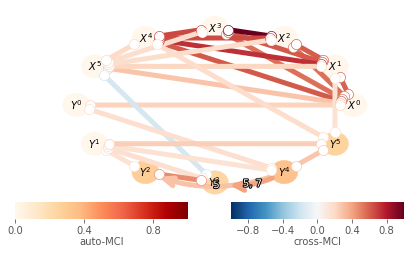

In [205]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names_companies,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()

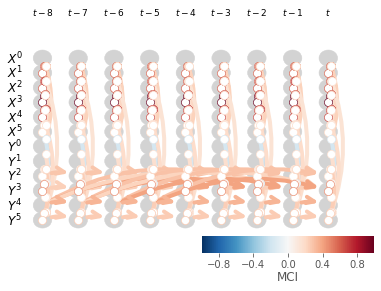

In [206]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names_companies,
    link_colorbar_label='MCI',
    ); plt.show()

##### Gaussian Processes

In [207]:
gpdc = GPDC(significance='analytic', gp_params=None)
pcmci_gpdc = PCMCI(
    dataframe=dataframe_companies, 
    cond_ind_test=gpdc,
    verbosity=0)

In [208]:
results = pcmci_gpdc.run_pcmci(tau_max=8, pc_alpha=0.5)
pcmci_gpdc.print_significant_links(
        p_matrix = results['p_matrix'], 
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)

C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
C:\Users\diego\anaconda3\envs\tigramite\lib\site-packages\sklearn\gaussian_process\kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
C:\Users\diego\anaconda3\env

In [ ]:
q_matrix = pcmci_gpdc.get_corrected_pvalues(p_matrix=results['p_matrix'], 
                                            tau_max=8, fdr_method='fdr_bh')
pcmci_gpdc.print_significant_links(
        p_matrix = results['p_matrix'], 
        q_matrix = q_matrix,  
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)

In [ ]:
link_matrix = pcmci_gpdc.return_significant_links(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

In [ ]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names_companies,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    ); plt.show()

In [ ]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    link_matrix=link_matrix,
    var_names=var_names_companies,
    link_colorbar_label='MCI',
    ); plt.show()

Implemented by Diego Saenz